In [137]:
import numpy as np

from ipywidgets import interact
from ipywidgets import FloatSlider

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import seaborn

%matplotlib inline

# Curse of dimensionality demo

# TODO:
* Add explanations
* Label plots
* Add titles
* Add style and branding

In [12]:
def calc_neighbourhood_side(sampling_percentage, dim):
    """Calculates the size of the necessary neighbourhood to encompass a certain
    percentage of samples.
    
    Args:
        sampling_percentage: Percentage of samples we want to encompass in our neighbourhood.
        dim: Dimensions of our space.
        
    Returns:
        The size of our neighbourhood along a dimension.
    """
    return sampling_percentage ** (1 / dim)

In [123]:
def plot_1d(sampling_percentage, ax, space_size = 10):
    space = np.arange(0, space_size + 1)
    
    neighbourhood_side = calc_neighbourhood_side(sampling_percentage, 1)
    print(neighbourhood_side)
    max_neigh = int(np.round(neighbourhood_side * space_size))
    neighbourhood = np.arange(0, max_neigh + 1) 
    
    
    ax.plot(space, 0 * space, color="red")
    ax.plot(neighbourhood, 0 * neighbourhood, color="blue")
    plt.gca().set_xticks(space)
    plt.gca().set_yticks([0])
    
    
def plot_2d(sampling_percentage, ax, space_size = 10):
    # Plot uniform distribution of points in a 2D space
    points = []
    for x in range(space_size * 5 + 1):
        for y in range(space_size * 5 + 1):
            points.append([x / 5, y / 5])
    space = np.array(points)
    ax.scatter(space[:, 0], space[:, 1], color="red", marker=".")
    
    # Plot neighbourhood necessary to capture the given percentage of space
    neighbourhood_side = calc_neighbourhood_side(sampling_percentage, 2)
    print(neighbourhood_side)
    max_neigh = int(np.round(neighbourhood_side * space_size))
    neighbourhood = np.arange(0, max_neigh + 1) 
    
    # Plot neighbourhood boundary
    ax.plot(neighbourhood, np.zeros(max_neigh + 1), color="blue")
    ax.plot(np.zeros(max_neigh + 1), neighbourhood , color="blue")
    ax.plot(neighbourhood, np.ones(max_neigh + 1) * max_neigh, color="blue")
    ax.plot(np.ones(max_neigh + 1) * max_neigh, neighbourhood, color="blue")
    
@interact(sampling_percentage = FloatSlider(min=0, max=1, step=0.1))
def _plot_demo(sampling_percentage):
    fig, axes = plt.subplots(1, 2, figsize=(19, 6))
    plot_1d(sampling_percentage, axes[0])
    plot_2d(sampling_percentage, axes[1])
    
# TODO: Add 3D
# TODO: Add print out of info
# TODO: Add explanation
# TODO: Add markdown formula
# TODO: Add title

interactive(children=(FloatSlider(value=0.0, description='sampling_percentage', max=1.0), Output()), _dom_classes=('widget-interact',))

In [61]:
def calc_nearest_neighbour_distance(n_samples, dim):
    """Calculates the distance from the origin to the closest sample.
    
    Args:
        n_samples: Number of samples in our dataset.
        dim: Dimensions of our space.
        
    Returns:
        The distance to the closest point to the origin.
    """
    dist = (1 - 0.5 ** (1 / n_samples)) ** (1 / dim)
    return dist

In [62]:
# TODO: Add markdown formula

In [90]:
x = np.arange(1, 1000)
y = [calc_nearest_neighbour_distance(i, 1) for i in x]
fig = plt.figure(figsize=(19, 7))
line, = plt.plot(x, y)
plt.ylim(0, 1)
plt.xlim(0, 1000)
plt.gca().set_yticks(np.arange(0, 1.1, 0.1))
plt.xlabel("Number of samples")
plt.ylabel("Distance to closest sample to origin")
plt.close()

@interact(max_num_samples = IntSlider(min=1, max=1000, step=10), dimension=IntSlider(min=1, max=10))
def plot_distance(max_num_samples, dimension):
    x = np.arange(1, max_num_samples)
    y = [calc_nearest_neighbour_distance(i, dimension) for i in x]
    line.set_xdata(x)
    line.set_ydata(y)
    display(fig)

interactive(children=(IntSlider(value=1, description='max_num_samples', max=1000, min=1, step=10), IntSlider(value=1, description='dimension', max=10, min=1), Output()), _dom_classes=('widget-interact',))

In [130]:
def plot_1d(n_samples, ax, space_size = 10):
    space = np.linspace(0, space_size, n_samples**2)
    y = np.zeros(n_samples**2)
    ax.scatter(space, y, color="red", marker="o")
    
    neighbourhood_side = 0.5
    captured_points = [p for p in space if p < neighbourhood_side * space_size]
    print("%d points encompassed in your 1D neighbourhood." % len(captured_points)    )
    max_neigh = int(np.round(neighbourhood_side * space_size))
    neighbourhood = np.arange(0, max_neigh + 1) 
    
    
    #ax.plot(space, 0 * space, color="blue")
    ax.plot(neighbourhood, 0 * neighbourhood, color="blue")
    plt.gca().set_xticks(space)
    plt.gca().set_yticks([0])
    
    
def plot_2d(n_samples, ax, space_size = 10):
    # Plot uniform distribution of points in a 2D space
    xs = np.linspace(0, space_size, n_samples)
    ys = np.linspace(0, space_size, n_samples)
    points = []
    for x in xs:
        for y in ys:
            points.append([x, y])
    
    space = np.array(points)
    ax.scatter(space[:, 0], space[:, 1], color="red", marker="o")
    
    plt.xlim((-1, space_size + 1))
    plt.ylim((-1, space_size + 1))
    
    ax.set_yticks(np.arange(0, space_size + 1))
    ax.set_xticks(np.arange(0, space_size + 1))
    
    # Plot neighbourhood necessary to capture the given percentage of space
    neighbourhood_side = 0.5
    captured_points = [p for p in points if p[0] < neighbourhood_side * space_size and p[1] < neighbourhood_side * space_size]
    print("%d points encompassed in your 2D neighbourhood." % len(captured_points))
    max_neigh = int(np.round(neighbourhood_side * space_size))
    neighbourhood = np.arange(0, max_neigh + 1) 
    
    # Plot neighbourhood boundary
    ax.plot(neighbourhood, np.zeros(max_neigh + 1), color="blue")
    ax.plot(np.zeros(max_neigh + 1), neighbourhood , color="blue")
    ax.plot(neighbourhood, np.ones(max_neigh + 1) * max_neigh, color="blue")
    ax.plot(np.ones(max_neigh + 1) * max_neigh, neighbourhood, color="blue")
    
@interact(sqrt_n_samples = IntSlider(min=1, max=20, step=1))
def _plot_demo(sqrt_n_samples):
    fig, axes = plt.subplots(1, 2, figsize=(19, 6))
    plot_1d(sqrt_n_samples, axes[0])
    plot_2d(sqrt_n_samples, axes[1])

interactive(children=(IntSlider(value=1, description='sqrt_n_samples', max=20, min=1), Output()), _dom_classes=('widget-interact',))

On the opposite, it's easy to see that we need a much higher sampling density to have the same number of training examples for a neighbourhood of higher dimension.

In [164]:
@interact(n_samples = IntSlider(min=1, max=1000, step=10))
def _plot(n_samples):
    fig, axes = plt.subplots(1, 2, figsize=(19, 10))

    # 2D PLOT
    f = lambda x: np.sin(x)
    x = np.linspace(0, 10, n_samples)
    y = f(x)

    axes[0].scatter(x, y)

    # 3D PLOT
    axes[1].remove()
    axes[1] = fig.add_subplot(1, 2, 2, projection='3d')
    #ax = axes[1](projection='3d')

    X = np.linspace(-5, 5, int(np.sqrt(n_samples)))
    Y = np.linspace(-5, 5, int(np.sqrt(n_samples)))
    X, Y = np.meshgrid(X, Y)

    R = np.sqrt(X**2 + Y**2)
    Z = np.sin(R)

    points = axes[1].scatter(X, Y, Z, cmap=cm.coolwarm, marker="o", s=100)

    axes[1].set_zlim(-1.01, 1.01)
    axes[1].zaxis.set_major_locator(LinearLocator(10))
    axes[1].zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)


interactive(children=(IntSlider(value=1, description='n_samples', max=200, min=1), Output()), _dom_classes=('widget-interact',))

As the dimension increases more and more samples are required to interpolate between each point, eventually since they reach the edge we need to extrapolate between points.  
It's easily visible here where the sin function can be easily identified with 15 points while it takes over 200 to identify the surface on the right.  
The full surface can be seen below:

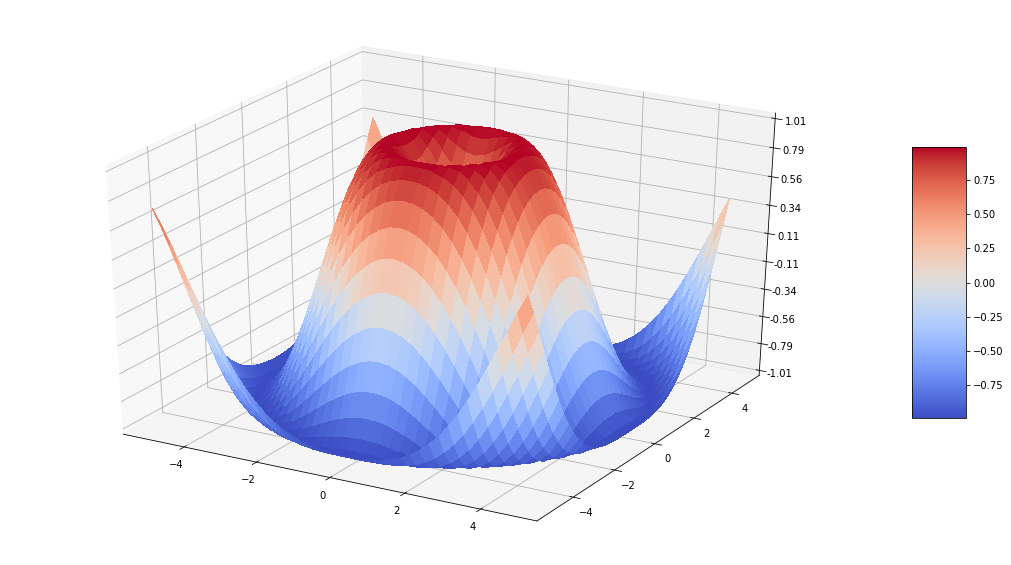

In [166]:
fig = plt.figure(figsize=(19, 10))
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

In [167]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')